<a href="https://colab.research.google.com/github/Jobairshi/Fruit-Classification/blob/main/MY_MAIN_SimpleHRNet_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch

### Clone the repo and install the dependencies

In [ ]:
!git clone https://github.com/stefanopini/simple-HRNet.git

Cloning into 'simple-HRNet'...
remote: Enumerating objects: 420, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 420 (delta 85), reused 73 (delta 73), pack-reused 319 (from 1)
Receiving objects: 100% (420/420), 78.05 MiB | 12.95 MiB/s, done.
Resolving deltas: 100% (217/217), done.


In [ ]:
%cd simple-HRNet
!pwd

/content/simple-HRNet
/content/simple-HRNet


In [ ]:
# install requirements
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.8 MB/s eta 0:00:00


In [ ]:
# install vlc to get video codecs
!apt install vlc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-freefont-ttf liba52-0.7.4 libaa1 libaribb24-0 libcddb2 libdca0 libdvbpsi10 libdvdnav4
  libdvdread8 libebml5 libevdev2 libfaad2 libgudev-1.0-0 libidn12 libinput-bin libinput10 libixml10
  libjansson4 libkate1 libldb2 liblirc-client0 liblmdb0 liblua5.2-0 liblzo2-2 libmad0 libmatroska7
  libmd4c0 libmpcdec6 libmpeg2-4 libmtdev1 libmtp-common libmtp-runtime libmtp9 libnfs13 libnotify4
  libopenmpt-modplug1 libplacebo192 libprotobuf-lite23 libproxy-tools libproxy1v5 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libqt5x11extras5
  libresid-builder0c2a libsdl-image1.2 libsdl1.2debian libsecret-1-0 libsecret-common libshout3
  libsidplay2 libsmbclient libspatialaudio0 libspeexdsp1 libtag1v5 libtag1v5-vanilla libtalloc2
  libtdb1 libtevent0 libudev1 libupnp13 libva-wayland2 libvlc-bin libvlc5 libvlccore9 l

### Add yolov3
Clone yolov3 for multiprocessing support. This can be skipped for single-person applications or if you plan to use YOLO v5 by Ultralytics.

In [ ]:
# download git submodules
!git submodule update --init --recursive

Submodule 'models/detectors/yolo' (https://github.com/eriklindernoren/PyTorch-YOLOv3) registered for path 'models_/detectors/yolo'
Cloning into '/content/simple-HRNet/models_/detectors/yolo'...
Submodule path 'models_/detectors/yolo': checked out '47b7c912877ca69db35b8af3a38d6522681b3bb3'


In [ ]:
%cd /content/simple-HRNet/models_/detectors/yolo
!pip install -q -r requirements.txt

%cd /content/simple-HRNet

/content/simple-HRNet/models_/detectors/yolo
/content/simple-HRNet


In [ ]:
%cd /content/simple-HRNet/models_/detectors/yolo/weights
!sh download_weights.sh
%cd /content/simple-HRNet

/content/simple-HRNet/models_/detectors/yolo/weights
--2024-12-13 04:16:08--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  12.6MB/s    in 20s     

2024-12-13 04:16:29 (11.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-12-13 04:16:29--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  10.2MB/s    in 3.3s    

2024-12-13 04:16:33 (10.2 MB/s) - ‘yolo

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
# download weights

# create weights folder
%cd /content/simple-HRNet
!mkdir weights
%cd /content/simple-HRNet/weights

# download weights pose_hrnet_w48_384x288.pth
!gdown 1UoJhTtjHNByZSm96W3yFTfU5upJnsKiS

# download weights pose_hrnet_w32_256x192.pth
!gdown 1zYC7go9EV0XaSlSBjMaiyE_4TcHc_S38

# download weights pose_hrnet_w32_256x256.pth
!gdown 1_wn2ifmoQprBrFvUCDedjPON4Y6jsN-v

# # download weights from your own Google Drive
# from glob import glob
# from google.colab import drive
# drive.mount('/content/drive')
# w_list = glob("/content/drive/<your drive folder>/*.pth")
# if not w_list:
#   raise FileNotFoundError("You haven't downloaded any pre-trained weights!")

%cd /content/simple-HRNet

/content/simple-HRNet
/content/simple-HRNet/weights
Downloading...
From (original): https://drive.google.com/uc?id=1UoJhTtjHNByZSm96W3yFTfU5upJnsKiS
From (redirected): https://drive.google.com/uc?id=1UoJhTtjHNByZSm96W3yFTfU5upJnsKiS&confirm=t&uuid=1a33bb66-5773-4673-bc17-090f754a122e
To: /content/simple-HRNet/weights/pose_hrnet_w48_384x288.pth
100% 255M/255M [00:08<00:00, 29.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1zYC7go9EV0XaSlSBjMaiyE_4TcHc_S38
From (redirected): https://drive.google.com/uc?id=1zYC7go9EV0XaSlSBjMaiyE_4TcHc_S38&confirm=t&uuid=6d8874b7-b852-4c09-ba3d-2838ee59c0a9
To: /content/simple-HRNet/weights/pose_hrnet_w32_256x192.pth
100% 115M/115M [00:03<00:00, 37.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1_wn2ifmoQprBrFvUCDedjPON4Y6jsN-v
From (redirected): https://drive.google.com/uc?id=1_wn2ifmoQprBrFvUCDedjPON4Y6jsN-v&confirm=t&uuid=ef94c3b3-12db-4ed8-92f6-8417a6731ae3
To: /content/simple-HRNet/weights/pose_hrnet_w32_

In [ ]:
# download a publicly available video (or just get your own)
!wget https://commondatastorage.googleapis.com/gtv-videos-bucket/sample/WeAreGoingOnBullrun.mp4

--2024-12-13 04:17:43--  https://commondatastorage.googleapis.com/gtv-videos-bucket/sample/WeAreGoingOnBullrun.mp4
Resolving commondatastorage.googleapis.com (commondatastorage.googleapis.com)... 172.217.194.207, 142.250.4.207, 172.253.118.207, ...
Connecting to commondatastorage.googleapis.com (commondatastorage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13183260 (13M) [video/mp4]
Saving to: ‘WeAreGoingOnBullrun.mp4’

WeAreGoingOnBullrun 100%[===================>]  12.57M  7.58MB/s    in 1.7s    

2024-12-13 04:17:45 (7.58 MB/s) - ‘WeAreGoingOnBullrun.mp4’ saved [13183260/13183260]



### Test the API


In [ ]:
import cv2
import requests
import matplotlib.pyplot as plt
import torch
from skimage import io
from PIL import Image
from SimpleHRNet import SimpleHRNet
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # singleperson, COCO weights
# model = SimpleHRNet(48, 17, "./weights/pose_hrnet_w48_384x288.pth", multiperson=False, device=device)

# # multiperson w/ YOLOv3, COCO weights
# model = SimpleHRNet(48, 17, "./weights/pose_hrnet_w48_384x288.pth", device=device)

# # multiperson w/ YOLOv3, COCO weights, small model
# model = SimpleHRNet(32, 17, "./weights/pose_hrnet_w32_256x192.pth", device=device)

# # multiperson w/ YOLOv3, MPII weights
# model = SimpleHRNet(32, 16, "./weights/pose_hrnet_w32_256x256.pth", yolo_version='v5', yolo_model_def='yolov5m',device=device)

# # multiperson w/ YOLOv5 (medium), COCO weights
model = SimpleHRNet(48, 17, "./weights/pose_hrnet_w48_384x288.pth", yolo_version='v5', yolo_model_def='yolov5m', device=device)

# multiperson w/ YOLOv5 nano, COCO weights, small model
# model = SimpleHRNet(32, 17, "./weights/pose_hrnet_w32_256x192.pth", yolo_version='v5', yolo_model_def='yolov5n', device=device)

url = 'https://drive.google.com/uc?export=download&id=1jCpFsM1VjFvMWTUxua2fJ3eWQqHk-S7y'
im = Image.open(requests.get(url, stream=True).raw)
image = io.imread(url)
result = model.predict(image)
print(result)
joints = model.predict(image)

/content/simple-HRNet/SimpleHRNet.py:117: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=self.device)


device: 'cuda' - 1 GPU(s) will be used


/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-12-13 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 40.8M/40.8M [00:01<00:00, 40.9MB/s]

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded


[[[     1434.3        1537     0.99001]
  [     1374.2      1597.1     0.98852]
  [     1374.2        1477     0.96363]
  [     1434.3      1687.2      0.9462]
  [     1434.3      1386.9     0.97594]
  [     1824.7      1837.3     0.92319]
  [     1794.7      1206.7     0.91513]
  [     2275.2      1957.4     0.91495]
  [     2275.2      1056.6      0.9315]
  [     2665.6      1867.3     0.93158]
  [     2695.6      1176.7     0.91053]
  [     2725.7      1717.2     0.79335]
  [     2725.7      1326.8     0.79579]
  [     3356.3      1657.1     0.89773]
  [     3386.3      1266.8     0.90794]
  [     3866.8      1567.1     0.91232]
  [       3987      1206.7     0.83069]]]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
!pip install json_tricks
!pip install pycocotools


!python scripts/train_coco.py

Traceback (most recent call last):
  File "/content/simple-HRNet/scripts/train_coco.py", line 12, in <module>
    from datasets.COCO import COCODataset
  File "/content/simple-HRNet/datasets/COCO.py", line 16, in <module>
    from misc.nms.nms import oks_nms
  File "/content/simple-HRNet/misc/nms/nms.py", line 13, in <module>
    from cpu_nms import cpu_nms
ModuleNotFoundError: No module named 'cpu_nms'


In [ ]:
from IPython.display import Image, display

# Display Loss Graph
display(Image('./logs/loss_graph.png'))

# Display Gain Graph
display(Image('./logs/gain_graph.png'))


FileNotFoundError: No such file or directory: './logs/loss_graph.png'

FileNotFoundError: No such file or directory: './logs/loss_graph.png'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: './logs/gain_graph.png'

FileNotFoundError: No such file or directory: './logs/gain_graph.png'

<IPython.core.display.Image object>

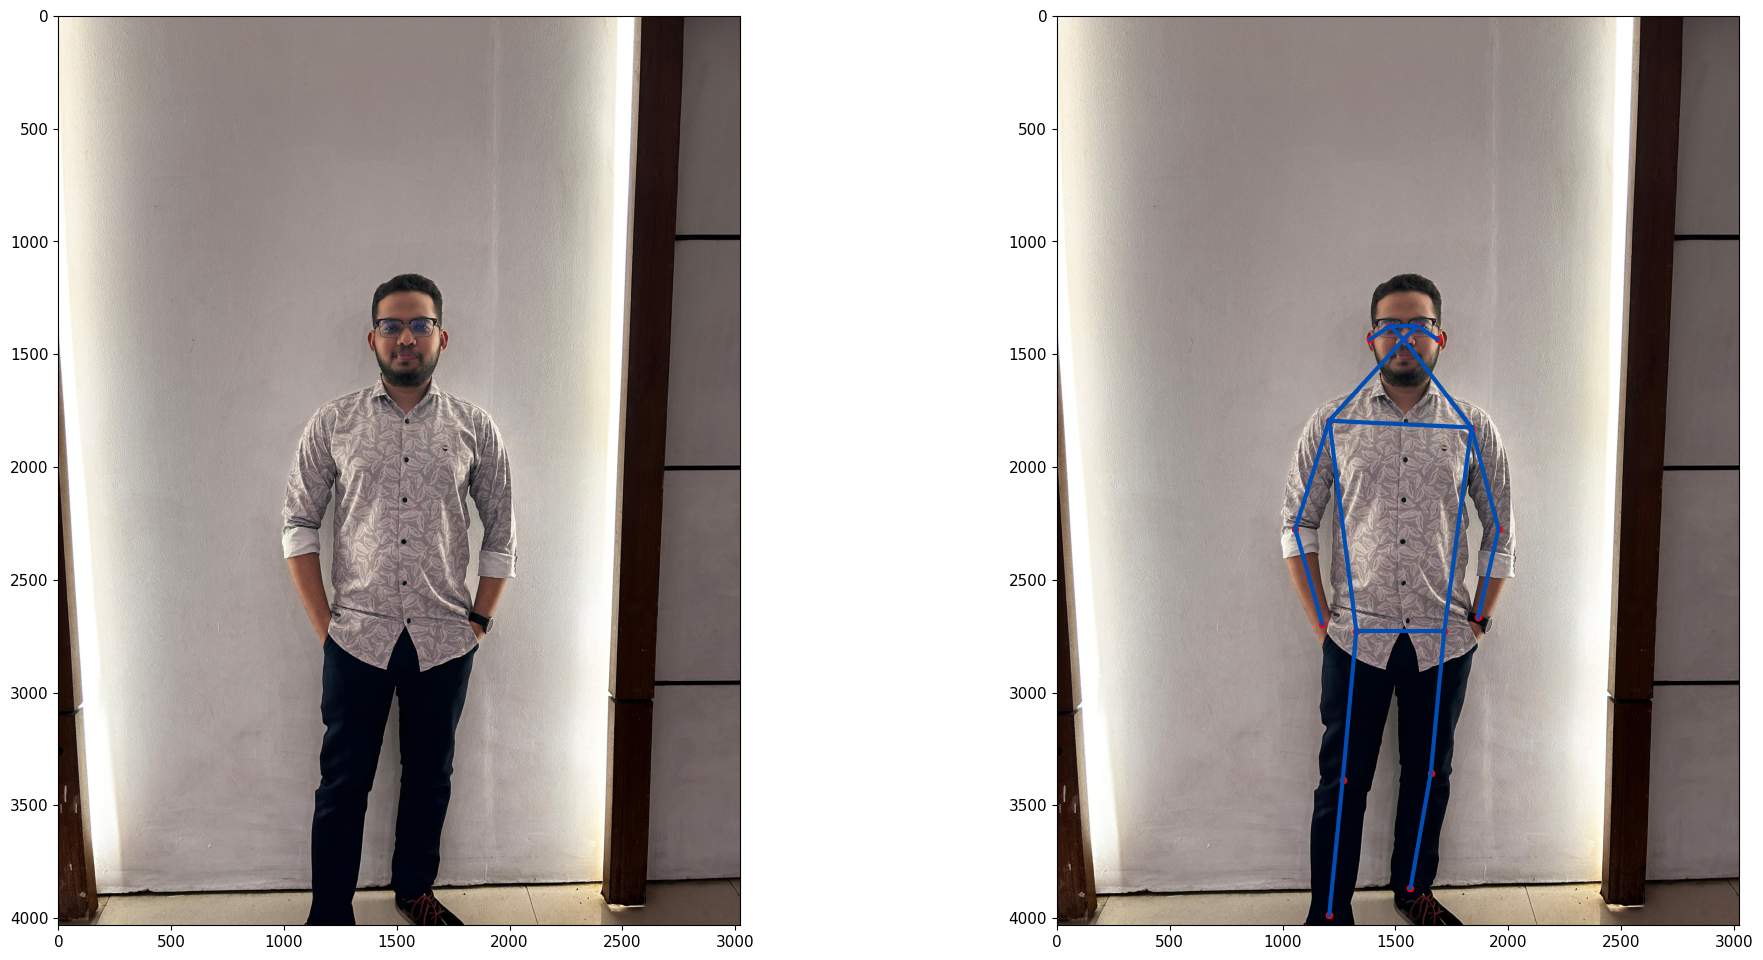

In [ ]:
%matplotlib inline
from misc.visualization import joints_dict

def plot_joints(ax, output):
    bones = joints_dict()["coco"]["skeleton"]
    # bones = joints_dict()["mpii"]["skeleton"]

    for bone in bones:
        xS = [output[:,bone[0],1], output[:,bone[1],1]]
        yS = [output[:,bone[0],0], output[:,bone[1],0]]
        ax.plot(xS, yS, linewidth=3, c=(0,0.3,0.7))
    ax.scatter(joints[:,:,1],joints[:,:,0], s=20, c='r')

fig = plt.figure(figsize=(60/2.54, 30/2.54))
ax = fig.add_subplot(121)
ax.imshow(Image.open(requests.get(url, stream=True).raw))
ax = fig.add_subplot(122)
ax.imshow(Image.open(requests.get(url, stream=True).raw))
plot_joints(ax, joints)
plt.show()

<ipython-input-13-3e6e5b59987d>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("rainbow")  # Use the "rainbow" colormap


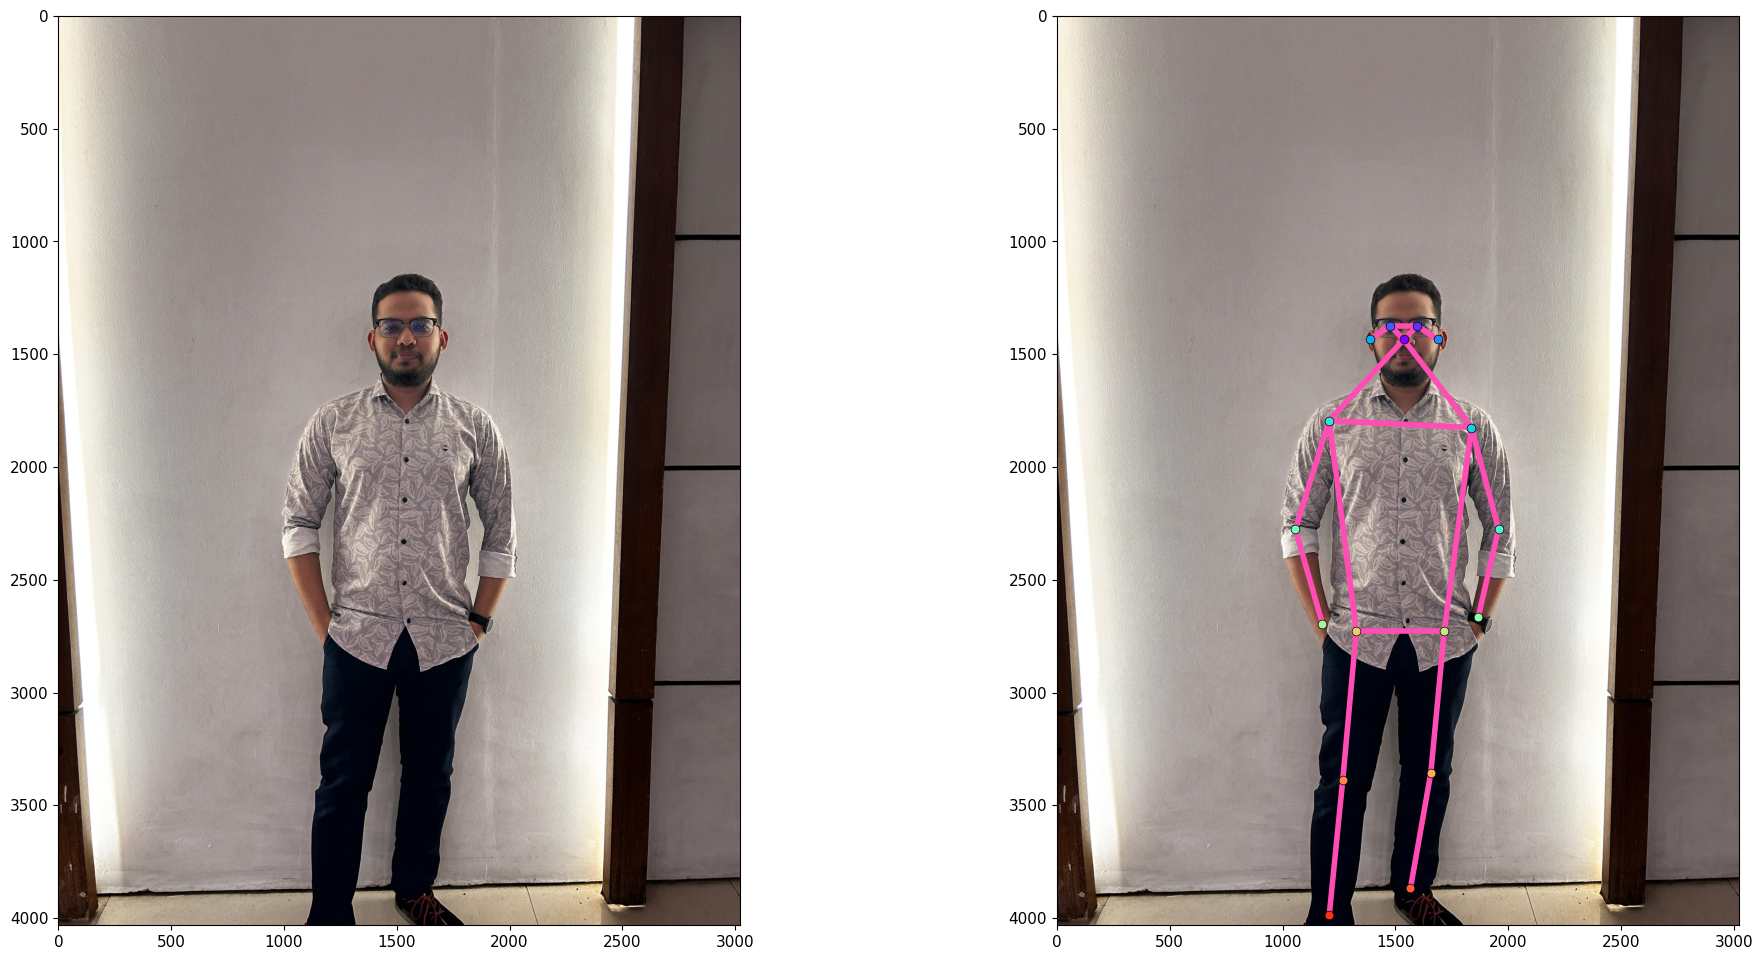

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
from misc.visualization import joints_dict

def plot_joints(ax, joints):
    bones = joints_dict()["coco"]["skeleton"]

    # Generate a gradient colormap for the joints
    num_joints = joints.shape[1]  # Number of joints
    cmap = get_cmap("rainbow")  # Use the "rainbow" colormap
    joint_colors = [cmap(i / num_joints) for i in range(num_joints)]  # Generate gradient colors

    # Plot bones
    for bone in bones:
        xS = [joints[:, bone[0], 1], joints[:, bone[1], 1]]
        yS = [joints[:, bone[0], 0], joints[:, bone[1], 0]]
        ax.plot(xS, yS, linewidth=4, c=(1, 0.3, 0.7))  # Use fixed color for bones (pink in this case)

    # Plot joints with gradient colors
    for joint_idx in range(num_joints):
        ax.scatter(
            joints[:, joint_idx, 1],
            joints[:, joint_idx, 0],
            s=40,
            c=[joint_colors[joint_idx]],  # Use the gradient color for this joint
            edgecolors="black",
            linewidths=0.5,
            zorder=5
        )

# Create the figure and axes
fig = plt.figure(figsize=(60 / 2.54, 30 / 2.54))
ax1 = fig.add_subplot(121)
ax1.imshow(Image.open(requests.get(url, stream=True).raw))
ax2 = fig.add_subplot(122)
ax2.imshow(Image.open(requests.get(url, stream=True).raw))

# Plot the joints with gradient coloring
plot_joints(ax2, joints)

# Show the plot
plt.show()


device: 'cuda' - 1 GPU(s) will be used


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-13 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


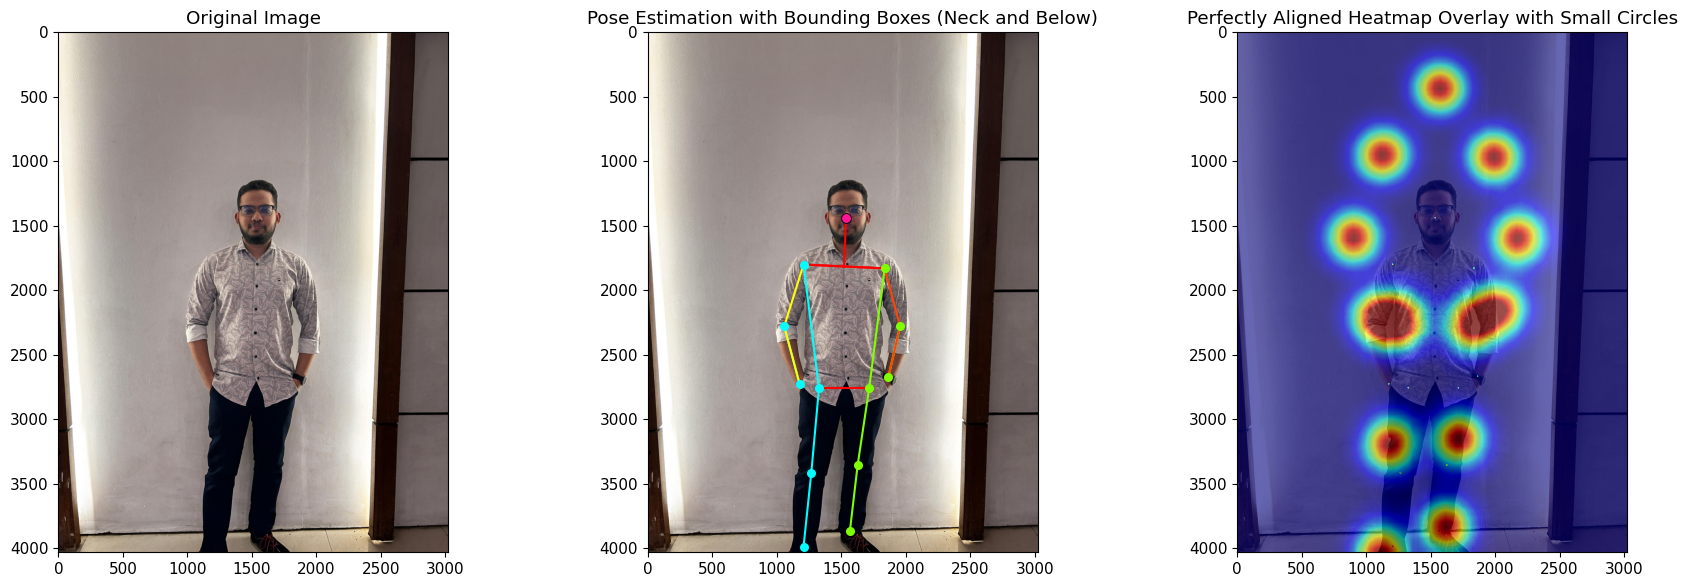

In [ ]:
import cv2
import requests
import matplotlib.pyplot as plt
import torch
from PIL import Image
from io import BytesIO
import numpy as np
from SimpleHRNet import SimpleHRNet
from misc.visualization import joints_dict

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the HRNet model for multiperson pose estimation with YOLOv5
model = SimpleHRNet(48, 17, "./weights/pose_hrnet_w48_384x288.pth", yolo_version='v5', yolo_model_def='yolov5m', device=device, return_heatmaps=True, return_bounding_boxes=True)

# Load image from URL
url = 'https://drive.google.com/uc?export=download&id=1jCpFsM1VjFvMWTUxua2fJ3eWQqHk-S7y'

response = requests.get(url)
image_pil = Image.open(BytesIO(response.content))  # Load image with PIL
image_rgb = np.array(image_pil)  # Convert to a numpy array for OpenCV and matplotlib

# Convert RGB to BGR for OpenCV compatibility (if necessary)
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

# Perform pose estimation
heatmaps, bounding_boxes, joints = model.predict(image_bgr)


def plot_joints_and_bboxes(ax, joints, bboxes):
    # Define bone groups for left and right parts with distinct colors
    right_leg_bones = [(8, 10), (12, 14), (14, 16)]  # Right leg
    left_leg_bones = [(7, 9), (11, 13), (13, 15)]  # Left leg
    right_torso_bones = [(6, 12)]  # Right torso
    left_torso_bones = [(5, 11)]  # Left torso
    shared_torso_bones = [(5, 6), (11, 12)]  # Shared torso bones
    left_hand_bones = [(6, 8), (8, 10)]  # Left arm to hand
    right_hand_bones = [(5, 7), (7, 9)]  # Right arm to hand

    # Define colors
    right_leg_and_torso_color = (0 / 255, 255 / 255, 255 / 255)  # Cyan
    left_leg_and_torso_color = (127 / 255, 255 / 255, 0 / 255)  # Lime Green
    left_hand_color = (255 / 255, 255 / 255, 0 / 255)  # Yellow
    right_hand_color = (255 / 255, 69 / 255, 0 / 255)  # Orange Red
    shared_torso_color = "red"
    node_color = (255 / 255, 20 / 255, 147 / 255)  # Deep Pink

    # Plot each bone
    for person in range(joints.shape[0]):
        # Plot shared torso bones
        for bone in shared_torso_bones:
            xS = [joints[person, bone[0], 1], joints[person, bone[1], 1]]
            yS = [joints[person, bone[0], 0], joints[person, bone[1], 0]]
            ax.plot(xS, yS, linewidth=1.5, c=shared_torso_color)  # Thinner line width

        # Plot right torso and leg bones
        for bone in right_leg_bones + right_torso_bones:
            xS = [joints[person, bone[0], 1], joints[person, bone[1], 1]]
            yS = [joints[person, bone[0], 0], joints[person, bone[1], 0]]
            ax.plot(xS, yS, linewidth=1.5, c=right_leg_and_torso_color)  # Thinner line width

        # Plot left torso and leg bones
        for bone in left_leg_bones + left_torso_bones:
            xS = [joints[person, bone[0], 1], joints[person, bone[1], 1]]
            yS = [joints[person, bone[0], 0], joints[person, bone[1], 0]]
            ax.plot(xS, yS, linewidth=1.5, c=left_leg_and_torso_color)  # Thinner line width

        # Plot left hand bones (same color for both ends)
        for bone in left_hand_bones:
            xS = [joints[person, bone[0], 1], joints[person, bone[1], 1]]
            yS = [joints[person, bone[0], 0], joints[person, bone[1], 0]]
            ax.plot(xS, yS, linewidth=1.5, c=left_hand_color)  # Thinner line width

        # Plot right hand bones (same color for both ends)
        for bone in right_hand_bones:
            xS = [joints[person, bone[0], 1], joints[person, bone[1], 1]]
            yS = [joints[person, bone[0], 0], joints[person, bone[1], 0]]
            ax.plot(xS, yS, linewidth=1.5, c=right_hand_color)  # Thinner line width

        # Add nose to shoulders connections
        nose = joints[person, 0, :]  # Nose joint
        left_shoulder = joints[person, 5, :]  # Left shoulder joint
        right_shoulder = joints[person, 6, :]  # Right shoulder joint
        middle_point = (left_shoulder[:2] + right_shoulder[:2]) / 2  # Middle of shoulders

        ax.plot([nose[1], middle_point[1]], [nose[0], middle_point[0]], linewidth=1.5, c=shared_torso_color)  # Thinner line width
        ax.plot([middle_point[1], left_shoulder[1]], [middle_point[0], left_shoulder[0]], linewidth=1.5, c=shared_torso_color)  # Thinner line width
        ax.plot([middle_point[1], right_shoulder[1]], [middle_point[0], right_shoulder[0]], linewidth=1.5, c=shared_torso_color)  # Thinner line width

        # Add nose marker
        ax.scatter(nose[1], nose[0], s=50, c=node_color, edgecolors="black", linewidths=0.6, zorder=10)

    # Scatter torso and lower body joints with right/left distinction
    right_joints = [6, 8, 10, 12, 14, 16]
    left_joints = [5, 7, 9, 11, 13, 15]
    right_filtered_joints = joints[:, right_joints, :]
    left_filtered_joints = joints[:, left_joints, :]

    ax.scatter(right_filtered_joints[:, :, 1], right_filtered_joints[:, :, 0], s=30, c=right_leg_and_torso_color, zorder=4)
    ax.scatter(left_filtered_joints[:, :, 1], left_filtered_joints[:, :, 0], s=30, c=left_leg_and_torso_color, zorder=4)










def plot_heatmaps_for_all_jointss(ax, joints, heatmaps, original_image_shape):
    # Exclude heatmaps for head joints (0, 1, 2, 3, 4)
    excluded_joints = [ 1, 2, 3, 4]

    # Initialize an empty array for the combined heatmap
    combined_heatmap = np.zeros((original_image_shape[0], original_image_shape[1]), dtype=np.float32)

    # Loop over each person and joint heatmap
    for person_idx, person_heatmaps in enumerate(heatmaps):
        for joint_idx, joint_heatmap in enumerate(person_heatmaps):
            if joint_idx in excluded_joints:
                continue  # Skip heatmaps for head joints

            # Resize the joint's heatmap to match the original image size
            heatmap_resized = cv2.resize(joint_heatmap, (original_image_shape[1], original_image_shape[0]), interpolation=cv2.INTER_LINEAR)

            # Normalize the heatmap for proper visualization
            if heatmap_resized.max() > 0:
                heatmap_resized /= heatmap_resized.max()

            # Add the resized heatmap to the combined heatmap
            combined_heatmap += heatmap_resized

        # Overlay individual joint locations as smaller circles
        for joint_idx, (y, x, confidence) in enumerate(joints[person_idx]):
            if joint_idx in excluded_joints or confidence <= 0.5:
                continue  # Skip head joints and low-confidence joints

            # Draw small circles at the exact joint positions
            circle = np.zeros_like(combined_heatmap, dtype=np.float32)
            cv2.circle(circle, (int(x), int(y)), 5, 1, thickness=-1)  # Circle radius = 5
            combined_heatmap += circle

    # Normalize the combined heatmap to ensure values are between 0 and 1
    combined_heatmap = np.clip(combined_heatmap, 0, 1)

    # Display the heatmap overlay
    ax.imshow(combined_heatmap, cmap='jet', alpha=0.6)  # Adjust alpha for better visibility




# Plotting results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
# Original image
axs[0].imshow(image_rgb)
axs[0].set_title("Original Image")

# Bounding Boxes and Joints
axs[1].imshow(image_rgb)
plot_joints_and_bboxes(axs[1], joints, bounding_boxes)
axs[1].set_title("Pose Estimation with Bounding Boxes (Neck and Below)")

# Heatmap for all joints of all people
axs[2].imshow(image_rgb)
# plot_heatmaps_for_all_jointss(axs[2], joints, heatmaps, image_rgb.shape)
axs[2].set_title("Perfectly Aligned Heatmap Overlay with Small Circles")

plt.tight_layout()
plt.show()


device: 'cuda' - 1 GPU(s) will be used


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-13 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


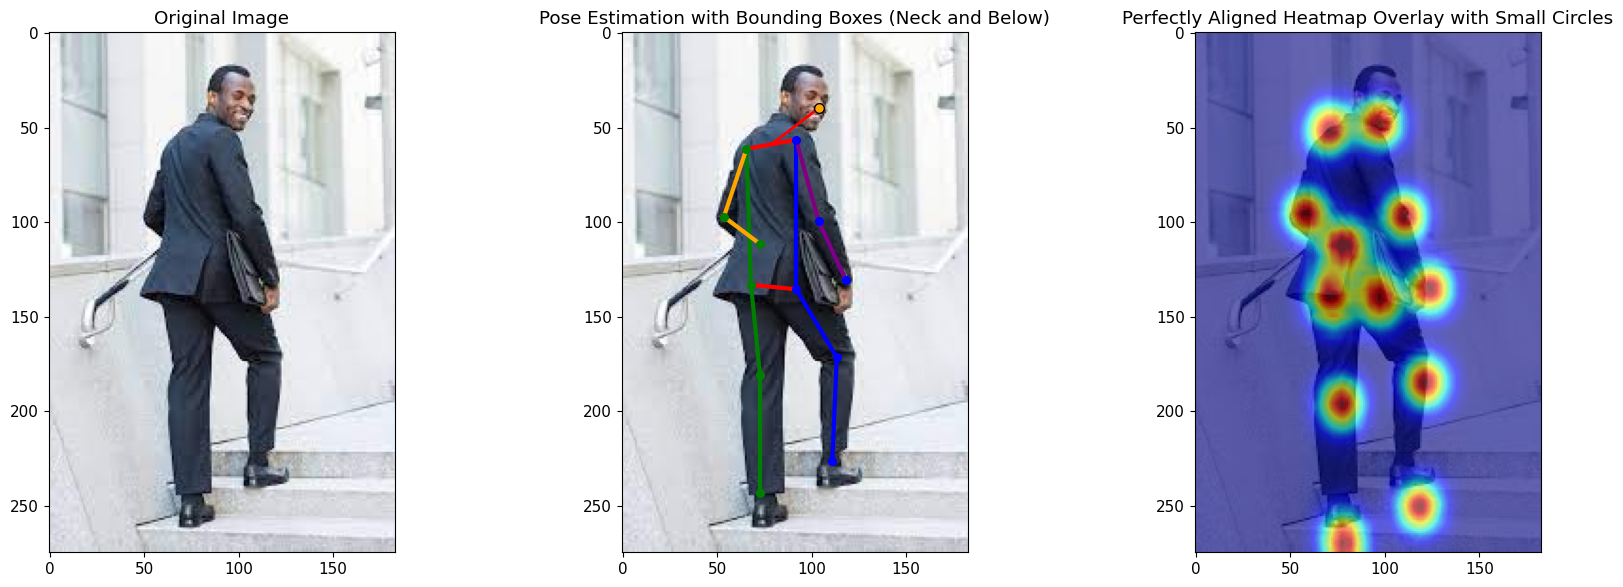

In [ ]:
import cv2
import requests
import matplotlib.pyplot as plt
import torch
from PIL import Image
from io import BytesIO
import numpy as np
from SimpleHRNet import SimpleHRNet
from misc.visualization import joints_dict

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the HRNet model for multiperson pose estimation with YOLOv5
model = SimpleHRNet(48, 17, "./weights/pose_hrnet_w48_384x288.pth", yolo_version='v5', yolo_model_def='yolov5m', device=device, return_heatmaps=True, return_bounding_boxes=True)

# Load image from URL
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSP7YPqw2TftDap5BkxKyAAWjYHrhLmA1BDjC3m8rnbYcl-_cHRehl2TTHUua869eSrU9w&usqp=CAU'
response = requests.get(url)
image_pil = Image.open(BytesIO(response.content))  # Load image with PIL
image_rgb = np.array(image_pil)  # Convert to a numpy array for OpenCV and matplotlib

# Convert RGB to BGR for OpenCV compatibility (if necessary)
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

# Perform pose estimation
heatmaps, bounding_boxes, joints = model.predict(image_bgr)


def plot_joints_and_bboxes(ax, joints, bboxes):
    # Define bone groups for left and right parts with distinct colors
    right_leg_bones = [(8, 10), (12, 14), (14, 16)]  # Right leg
    left_leg_bones = [(7, 9), (11, 13), (13, 15)]  # Left leg
    right_torso_bones = [(6, 12)]  # Right torso
    left_torso_bones = [(5, 11)]  # Left torso
    shared_torso_bones = [(5, 6), (11, 12)]  # Shared torso bones
    left_hand_bones = [(6, 8), (8, 10)]  # Left arm to hand
    right_hand_bones = [(5, 7), (7, 9)]  # Right arm to hand

    # Define colors
    right_leg_and_torso_color = "blue"
    left_leg_and_torso_color = "green"
    left_hand_color = "purple"
    right_hand_color = "orange"
    shared_torso_color = "red"

    # Plot each bone
    for person in range(joints.shape[0]):
        # Plot shared torso bones
        for bone in shared_torso_bones:
            xS = [joints[person, bone[0], 1], joints[person, bone[1], 1]]
            yS = [joints[person, bone[0], 0], joints[person, bone[1], 0]]
            ax.plot(xS, yS, linewidth=3, c=shared_torso_color)

        # Plot right torso and leg bones
        for bone in right_leg_bones + right_torso_bones:
            xS = [joints[person, bone[0], 1], joints[person, bone[1], 1]]
            yS = [joints[person, bone[0], 0], joints[person, bone[1], 0]]
            ax.plot(xS, yS, linewidth=3, c=right_leg_and_torso_color)

        # Plot left torso and leg bones
        for bone in left_leg_bones + left_torso_bones:
            xS = [joints[person, bone[0], 1], joints[person, bone[1], 1]]
            yS = [joints[person, bone[0], 0], joints[person, bone[1], 0]]
            ax.plot(xS, yS, linewidth=3, c=left_leg_and_torso_color)

        # Plot left hand bones (same color for both ends)
        for bone in left_hand_bones:
            xS = [joints[person, bone[0], 1], joints[person, bone[1], 1]]
            yS = [joints[person, bone[0], 0], joints[person, bone[1], 0]]
            ax.plot(xS, yS, linewidth=3, c=left_hand_color)

        # Plot right hand bones (same color for both ends)
        for bone in right_hand_bones:
            xS = [joints[person, bone[0], 1], joints[person, bone[1], 1]]
            yS = [joints[person, bone[0], 0], joints[person, bone[1], 0]]
            ax.plot(xS, yS, linewidth=3, c=right_hand_color)

        # Add nose to shoulders connections
        nose = joints[person, 0, :]  # Nose joint
        left_shoulder = joints[person, 5, :]  # Left shoulder joint
        right_shoulder = joints[person, 6, :]  # Right shoulder joint
        middle_point = (left_shoulder[:2] + right_shoulder[:2]) / 2  # Middle of shoulders

        ax.plot([nose[1], middle_point[1]], [nose[0], middle_point[0]], linewidth=2, c=shared_torso_color)
        ax.plot([middle_point[1], left_shoulder[1]], [middle_point[0], left_shoulder[0]], linewidth=2, c=shared_torso_color)
        ax.plot([middle_point[1], right_shoulder[1]], [middle_point[0], right_shoulder[0]], linewidth=2, c=shared_torso_color)

        # Add nose marker
        ax.scatter(nose[1], nose[0], s=50, c='orange', edgecolors="black", linewidths=1, zorder=10)

    # Scatter torso and lower body joints with right/left distinction
    right_joints = [6, 8, 10, 12, 14, 16]
    left_joints = [5, 7, 9, 11, 13, 15]
    right_filtered_joints = joints[:, right_joints, :]
    left_filtered_joints = joints[:, left_joints, :]

    ax.scatter(right_filtered_joints[:, :, 1], right_filtered_joints[:, :, 0], s=30, c=right_leg_and_torso_color, zorder=4)
    ax.scatter(left_filtered_joints[:, :, 1], left_filtered_joints[:, :, 0], s=30, c=left_leg_and_torso_color, zorder=4)








def plot_heatmaps_for_all_jointss(ax, joints, heatmaps, original_image_shape):
    # Exclude heatmaps for head joints (0, 1, 2, 3, 4)
    excluded_joints = [0, 1, 2, 3, 4]

    # Initialize an empty array for the combined heatmap
    combined_heatmap = np.zeros((original_image_shape[0], original_image_shape[1]), dtype=np.float32)

    # Loop over each person and joint heatmap
    for person_idx, person_heatmaps in enumerate(heatmaps):
        for joint_idx, joint_heatmap in enumerate(person_heatmaps):
            if joint_idx in excluded_joints:
                continue  # Skip heatmaps for head joints

            # Resize the joint's heatmap to match the original image size
            heatmap_resized = cv2.resize(joint_heatmap, (original_image_shape[1], original_image_shape[0]), interpolation=cv2.INTER_LINEAR)

            # Normalize the heatmap for proper visualization
            if heatmap_resized.max() > 0:
                heatmap_resized /= heatmap_resized.max()

            # Add the resized heatmap to the combined heatmap
            combined_heatmap += heatmap_resized

        # Overlay individual joint locations as smaller circles
        for joint_idx, (y, x, confidence) in enumerate(joints[person_idx]):
            if joint_idx in excluded_joints or confidence <= 0.5:
                continue  # Skip head joints and low-confidence joints

            # Draw small circles at the exact joint positions
            circle = np.zeros_like(combined_heatmap, dtype=np.float32)
            # cv2.circle(circle, (int(x), int(y)), 5, 1, thickness=-1)  # Circle radius = 5
            combined_heatmap += circle

    # Normalize the combined heatmap to ensure values are between 0 and 1
    combined_heatmap = np.clip(combined_heatmap, 0, 1)

    # Display the heatmap overlay
    ax.imshow(combined_heatmap, cmap='jet', alpha=0.6)  # Adjust alpha for better visibility




# Plotting results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
# Original image
axs[0].imshow(image_rgb)
axs[0].set_title("Original Image")

# Bounding Boxes and Joints
axs[1].imshow(image_rgb)
plot_joints_and_bboxes(axs[1], joints, bounding_boxes)
axs[1].set_title("Pose Estimation with Bounding Boxes (Neck and Below)")

# Heatmap for all joints of all people
axs[2].imshow(image_rgb)
plot_heatmaps_for_all_jointss(axs[2], joints, heatmaps, image_rgb.shape)
axs[2].set_title("Perfectly Aligned Heatmap Overlay with Small Circles")

plt.tight_layout()
plt.show()


**This part ignores head part**

device: 'cuda' - 1 GPU(s) will be used


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-13 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


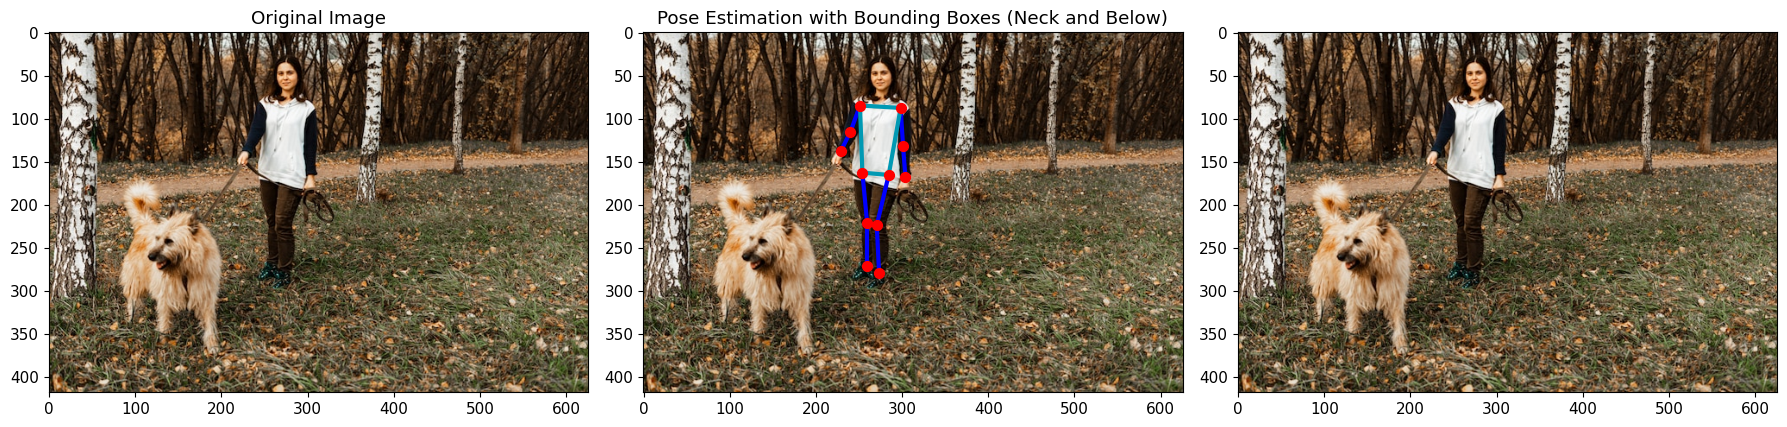

In [ ]:
import cv2
import requests
import matplotlib.pyplot as plt
import torch
from PIL import Image
from io import BytesIO
import numpy as np
from SimpleHRNet import SimpleHRNet
from misc.visualization import joints_dict

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the HRNet model for multiperson pose estimation with YOLOv5
model = SimpleHRNet(48, 17, "./weights/pose_hrnet_w48_384x288.pth", yolo_version='v5', yolo_model_def='yolov5m', device=device, return_heatmaps=True, return_bounding_boxes=True)

# Load image from URL
url = 'https://img.freepik.com/premium-photo/animal-training-volunteer-girl-walks-with-dog-from-animal-shelter-girl-with-dog-autumn-park_100894-1181.jpg'
response = requests.get(url)
image_pil = Image.open(BytesIO(response.content))  # Load image with PIL
image_rgb = np.array(image_pil)  # Convert to a numpy array for OpenCV and matplotlib

# Convert RGB to BGR for OpenCV compatibility (if necessary)
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

# Perform pose estimation
heatmaps, bounding_boxes, joints = model.predict(image_bgr)

def plot_joints_and_bboxes(ax, joints, bboxes):
    bones = joints_dict()["coco"]["skeleton"]

    # Define colors for different body parts
    hand_color = (0, 1, 0)         # Green for hands
    lower_body_color = (0, 0, 1)    # Blue for lower body
    default_color = (0, 0.6, 0.7)   # Default color

    # Define bone groups for neck and below (excluding face bones)
    lower_body_bones = [(5, 7), (7, 9), (6, 8), (8, 10), (11, 13), (13, 15), (12, 14), (14, 16)]
    torso_bones = [(5, 6), (5, 11), (6, 12), (11, 12)]

    # Combine all relevant bones
    filtered_bones = lower_body_bones + torso_bones

    # Plot each bone with a different color based on its category
    for bone in filtered_bones:
        for person in range(joints.shape[0]):
            xS = [joints[person, bone[0], 1], joints[person, bone[1], 1]]
            yS = [joints[person, bone[0], 0], joints[person, bone[1], 0]]

            if bone in lower_body_bones:
                color = lower_body_color
            else:
                color = default_color

            ax.plot(xS, yS, linewidth=3, c=color)

    # Scatter for joints (only torso and lower body)
    torso_and_lower_joints = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    filtered_joints = joints[:, torso_and_lower_joints, :]
    ax.scatter(filtered_joints[:, :, 1], filtered_joints[:, :, 0], s=50, c='red', zorder=5)
def plot_heatmaps_for_all_jointss(ax, joints, heatmaps, original_image_shape):
    # Exclude heatmaps for head joints (0, 1, 2, 3, 4)
    excluded_joints = [0, 1, 2, 3, 4]

    # Initialize an empty array for the combined heatmap
    combined_heatmap = np.zeros((original_image_shape[0], original_image_shape[1]), dtype=np.float32)

    # Loop over each person and joint heatmap
    for person_idx, person_heatmaps in enumerate(heatmaps):
        for joint_idx, joint_heatmap in enumerate(person_heatmaps):
            if joint_idx in excluded_joints:
                continue  # Skip heatmaps for head joints

            # Resize the joint's heatmap to match the original image size
            heatmap_resized = cv2.resize(joint_heatmap, (original_image_shape[1], original_image_shape[0]), interpolation=cv2.INTER_LINEAR)

            # Normalize the heatmap for proper visualization
            if heatmap_resized.max() > 0:
                heatmap_resized /= heatmap_resized.max()

            # Add the resized heatmap to the combined heatmap
            combined_heatmap += heatmap_resized

        # Overlay individual joint locations as smaller circles
        for joint_idx, (y, x, confidence) in enumerate(joints[person_idx]):
            if joint_idx in excluded_joints or confidence <= 0.5:
                continue  # Skip head joints and low-confidence joints

            # Draw small circles at the exact joint positions
            circle = np.zeros_like(combined_heatmap, dtype=np.float32)
            cv2.circle(circle, (int(x), int(y)), 5, 1, thickness=-1)  # Circle radius = 5
            combined_heatmap += circle

    # Normalize the combined heatmap to ensure values are between 0 and 1
    combined_heatmap = np.clip(combined_heatmap, 0, 1)

    # Display the heatmap overlay
    ax.imshow(combined_heatmap, cmap='jet', alpha=0.6)  # Adjust alpha for better visibility


# Plotting results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
# Original image
axs[0].imshow(image_rgb)
axs[0].set_title("Original Image")

# Bounding Boxes and Joints
axs[1].imshow(image_rgb)
plot_joints_and_bboxes(axs[1], joints, bounding_boxes)
axs[1].set_title("Pose Estimation with Bounding Boxes (Neck and Below)")

# Heatmap for all joints of all people
axs[2].imshow(image_rgb)
# plot_heatmaps_for_all_jointss(axs[2], joints, heatmaps, image_rgb.shape)
# axs[2].set_title("Perfectly Aligned Heatmap Overlay with Small Circles")

plt.tight_layout()
plt.show()


**this is grad cam part:::**

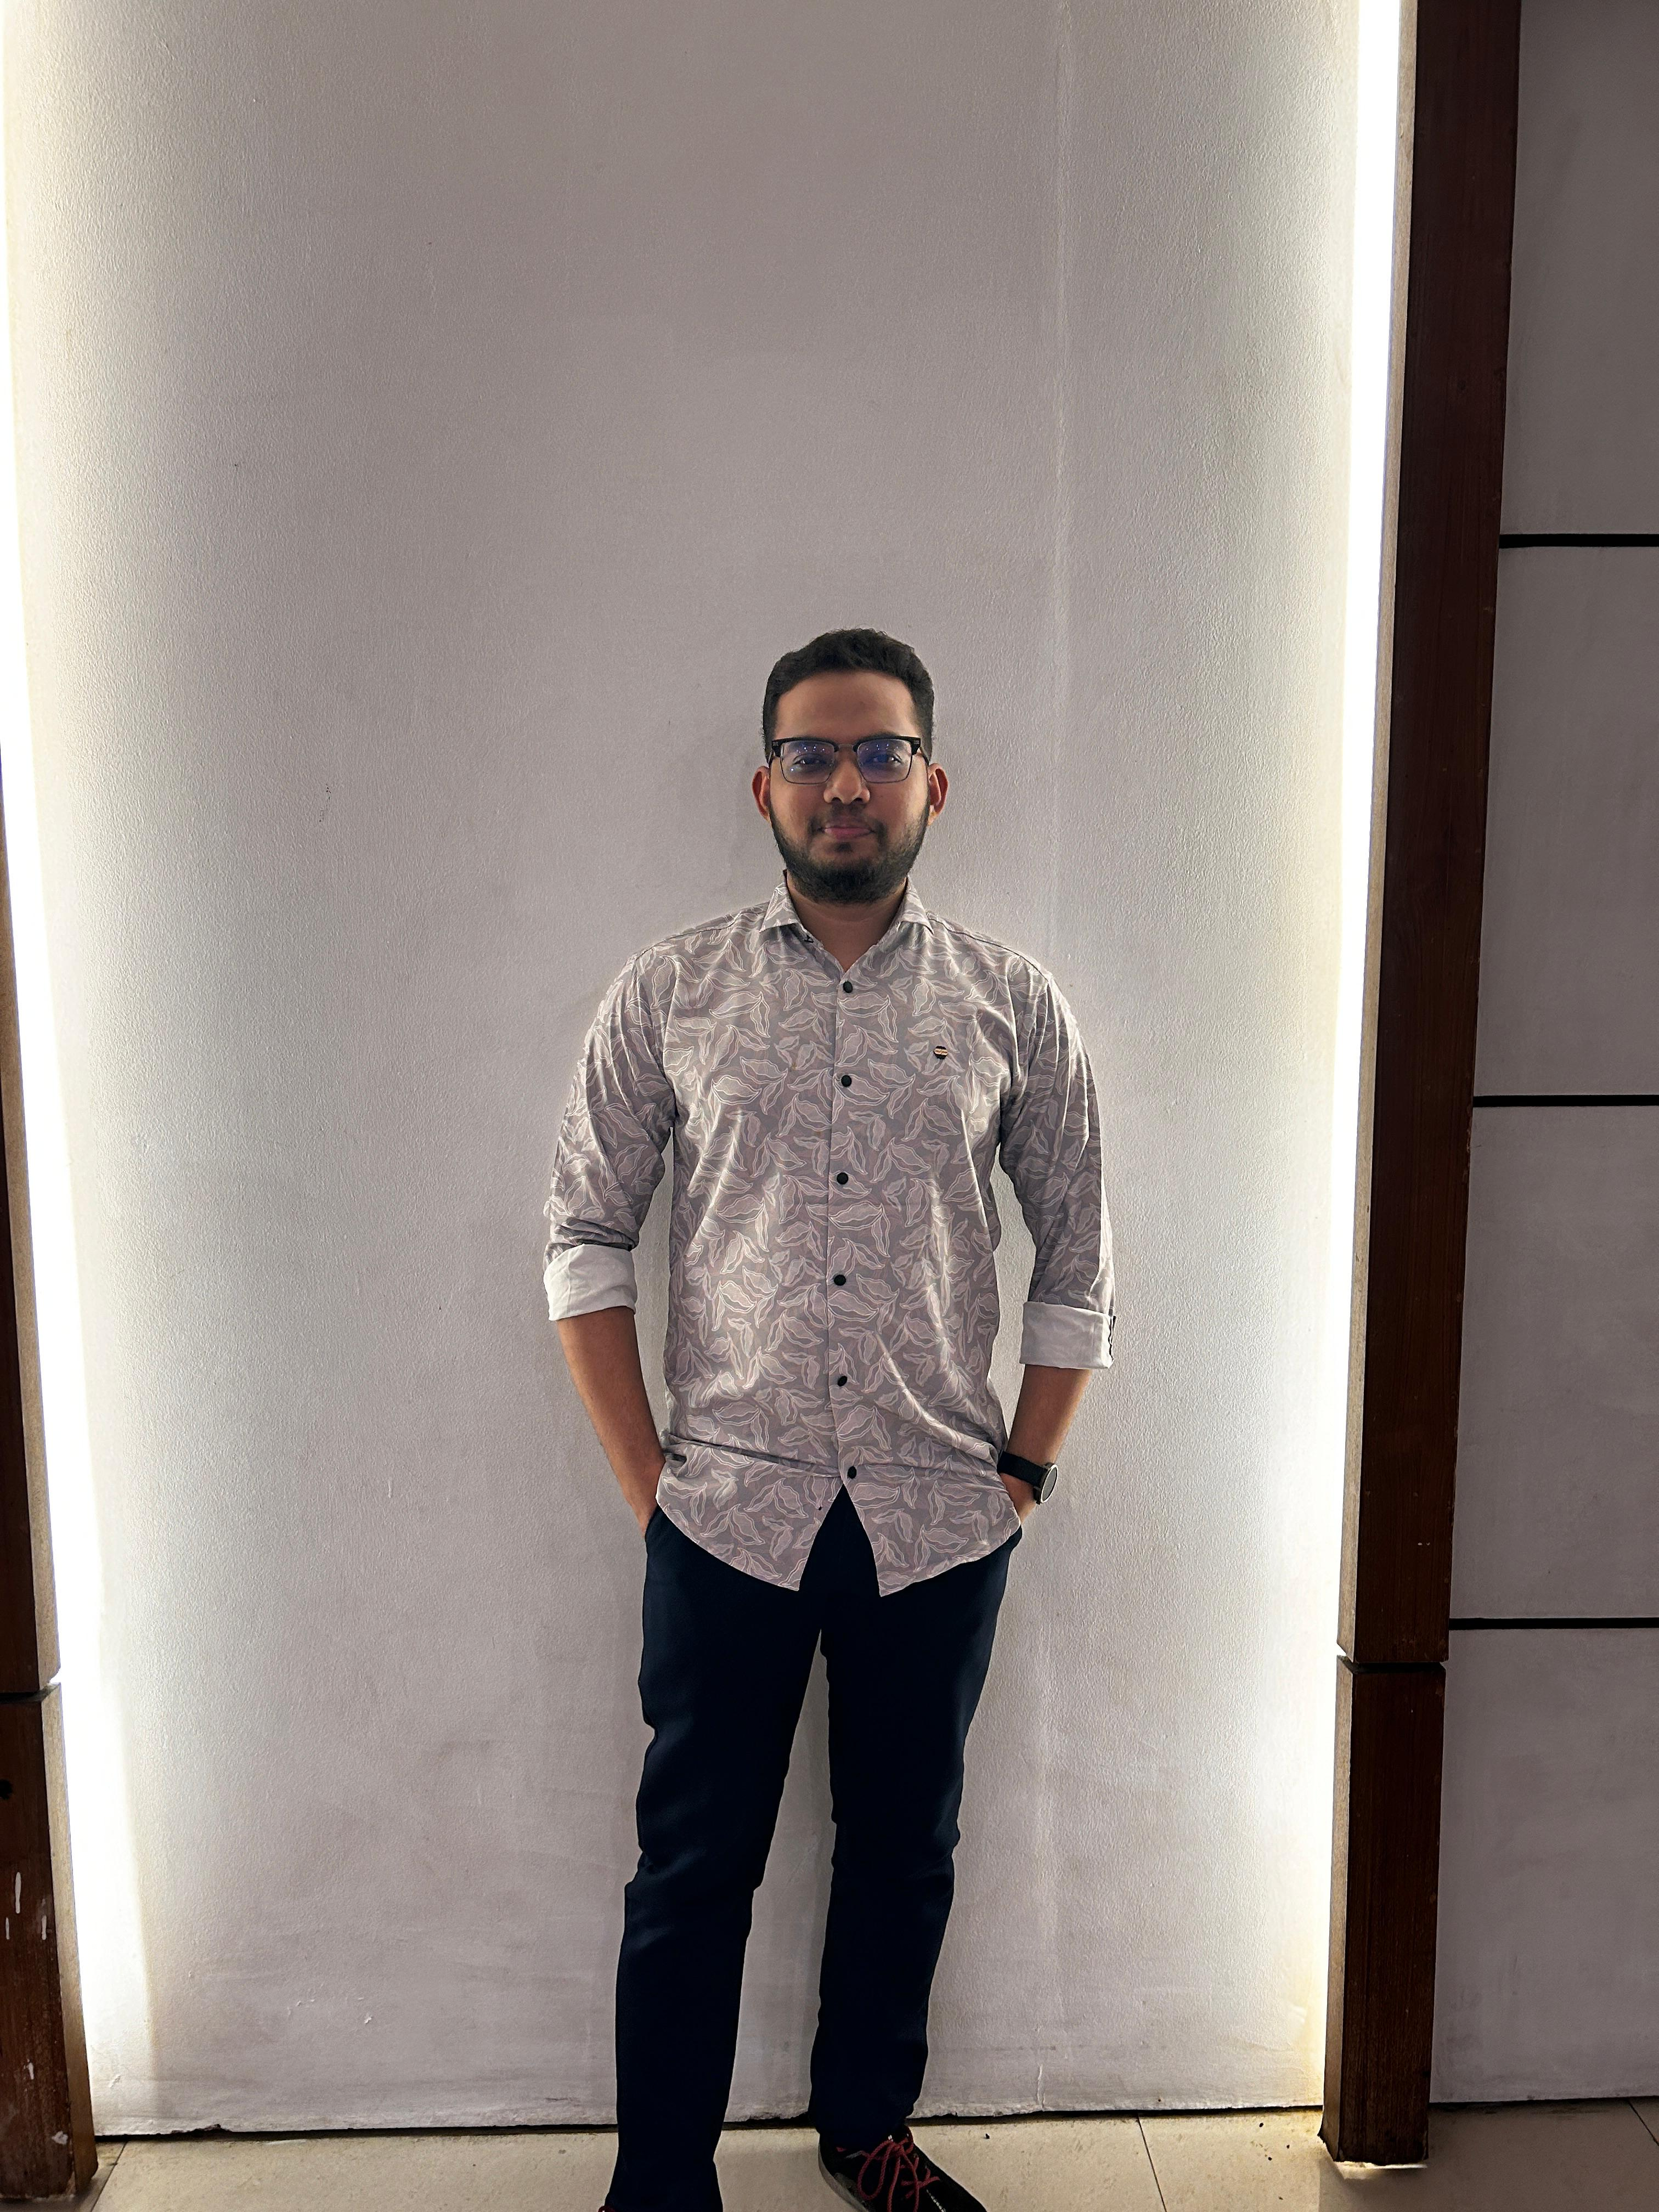

In [ ]:
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

# model_builder = keras.applications.resnet50.ResNet50
# img_size = (224, 224)  # ResNet50 uses 224x224 images
# preprocess_input = keras.applications.resnet50.preprocess_input
# decode_predictions = keras.applications.resnet50.decode_predictions

# last_conv_layer_name = "conv5_block3_out"  # ResNet50's last conv layer name


# model_builder = keras.applications.vgg16.VGG16
# img_size = (224, 224)  # VGG16 uses 224x224 images
# preprocess_input = keras.applications.vgg16.preprocess_input
# decode_predictions = keras.applications.vgg16.decode_predictions

# last_conv_layer_name = "block5_conv3"  # VGG16's last conv layer name

## The local path to our target image

img_path= "/content/simple-HRNet/test000001.jpg"

display(Image(img_path))
def get_img_array(img_path, size):
    ## `img` is a PIL image
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    ## We add a dimension to transform our array into a "batch"
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    ## First, we create a model that maps the input image to the activations
    ## of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    ## Then, we compute the gradient of the top predicted class for our input image
    ## for the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    ## We are doing transfer learning on last layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    ## This is a vector where each entry is the mean intensity of the gradient
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    ## calculates a heatmap highlighting the regions of importance in an image
    ## for a specific
    ## predicted class by combining the output of the last convolutional layer
    ## with the pooled gradients.
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    ## For visualization purpose
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Predicted of image: [('n04356056', 'sunglasses', 6.725964)]


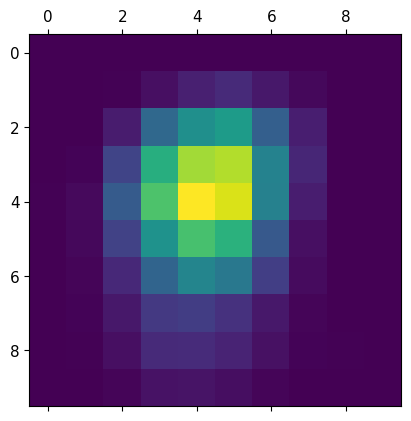

In [ ]:
## Preparing the image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

## Making the model with imagenet dataset
model = model_builder(weights="imagenet")

## Remove last layer's softmax(transfer learning)
model.layers[-1].activation = None

preds = model.predict(img_array)
print("Predicted of image:", decode_predictions(preds, top=1)[0])

## Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

## visulization of heatmap
plt.matshow(heatmap)
plt.show()

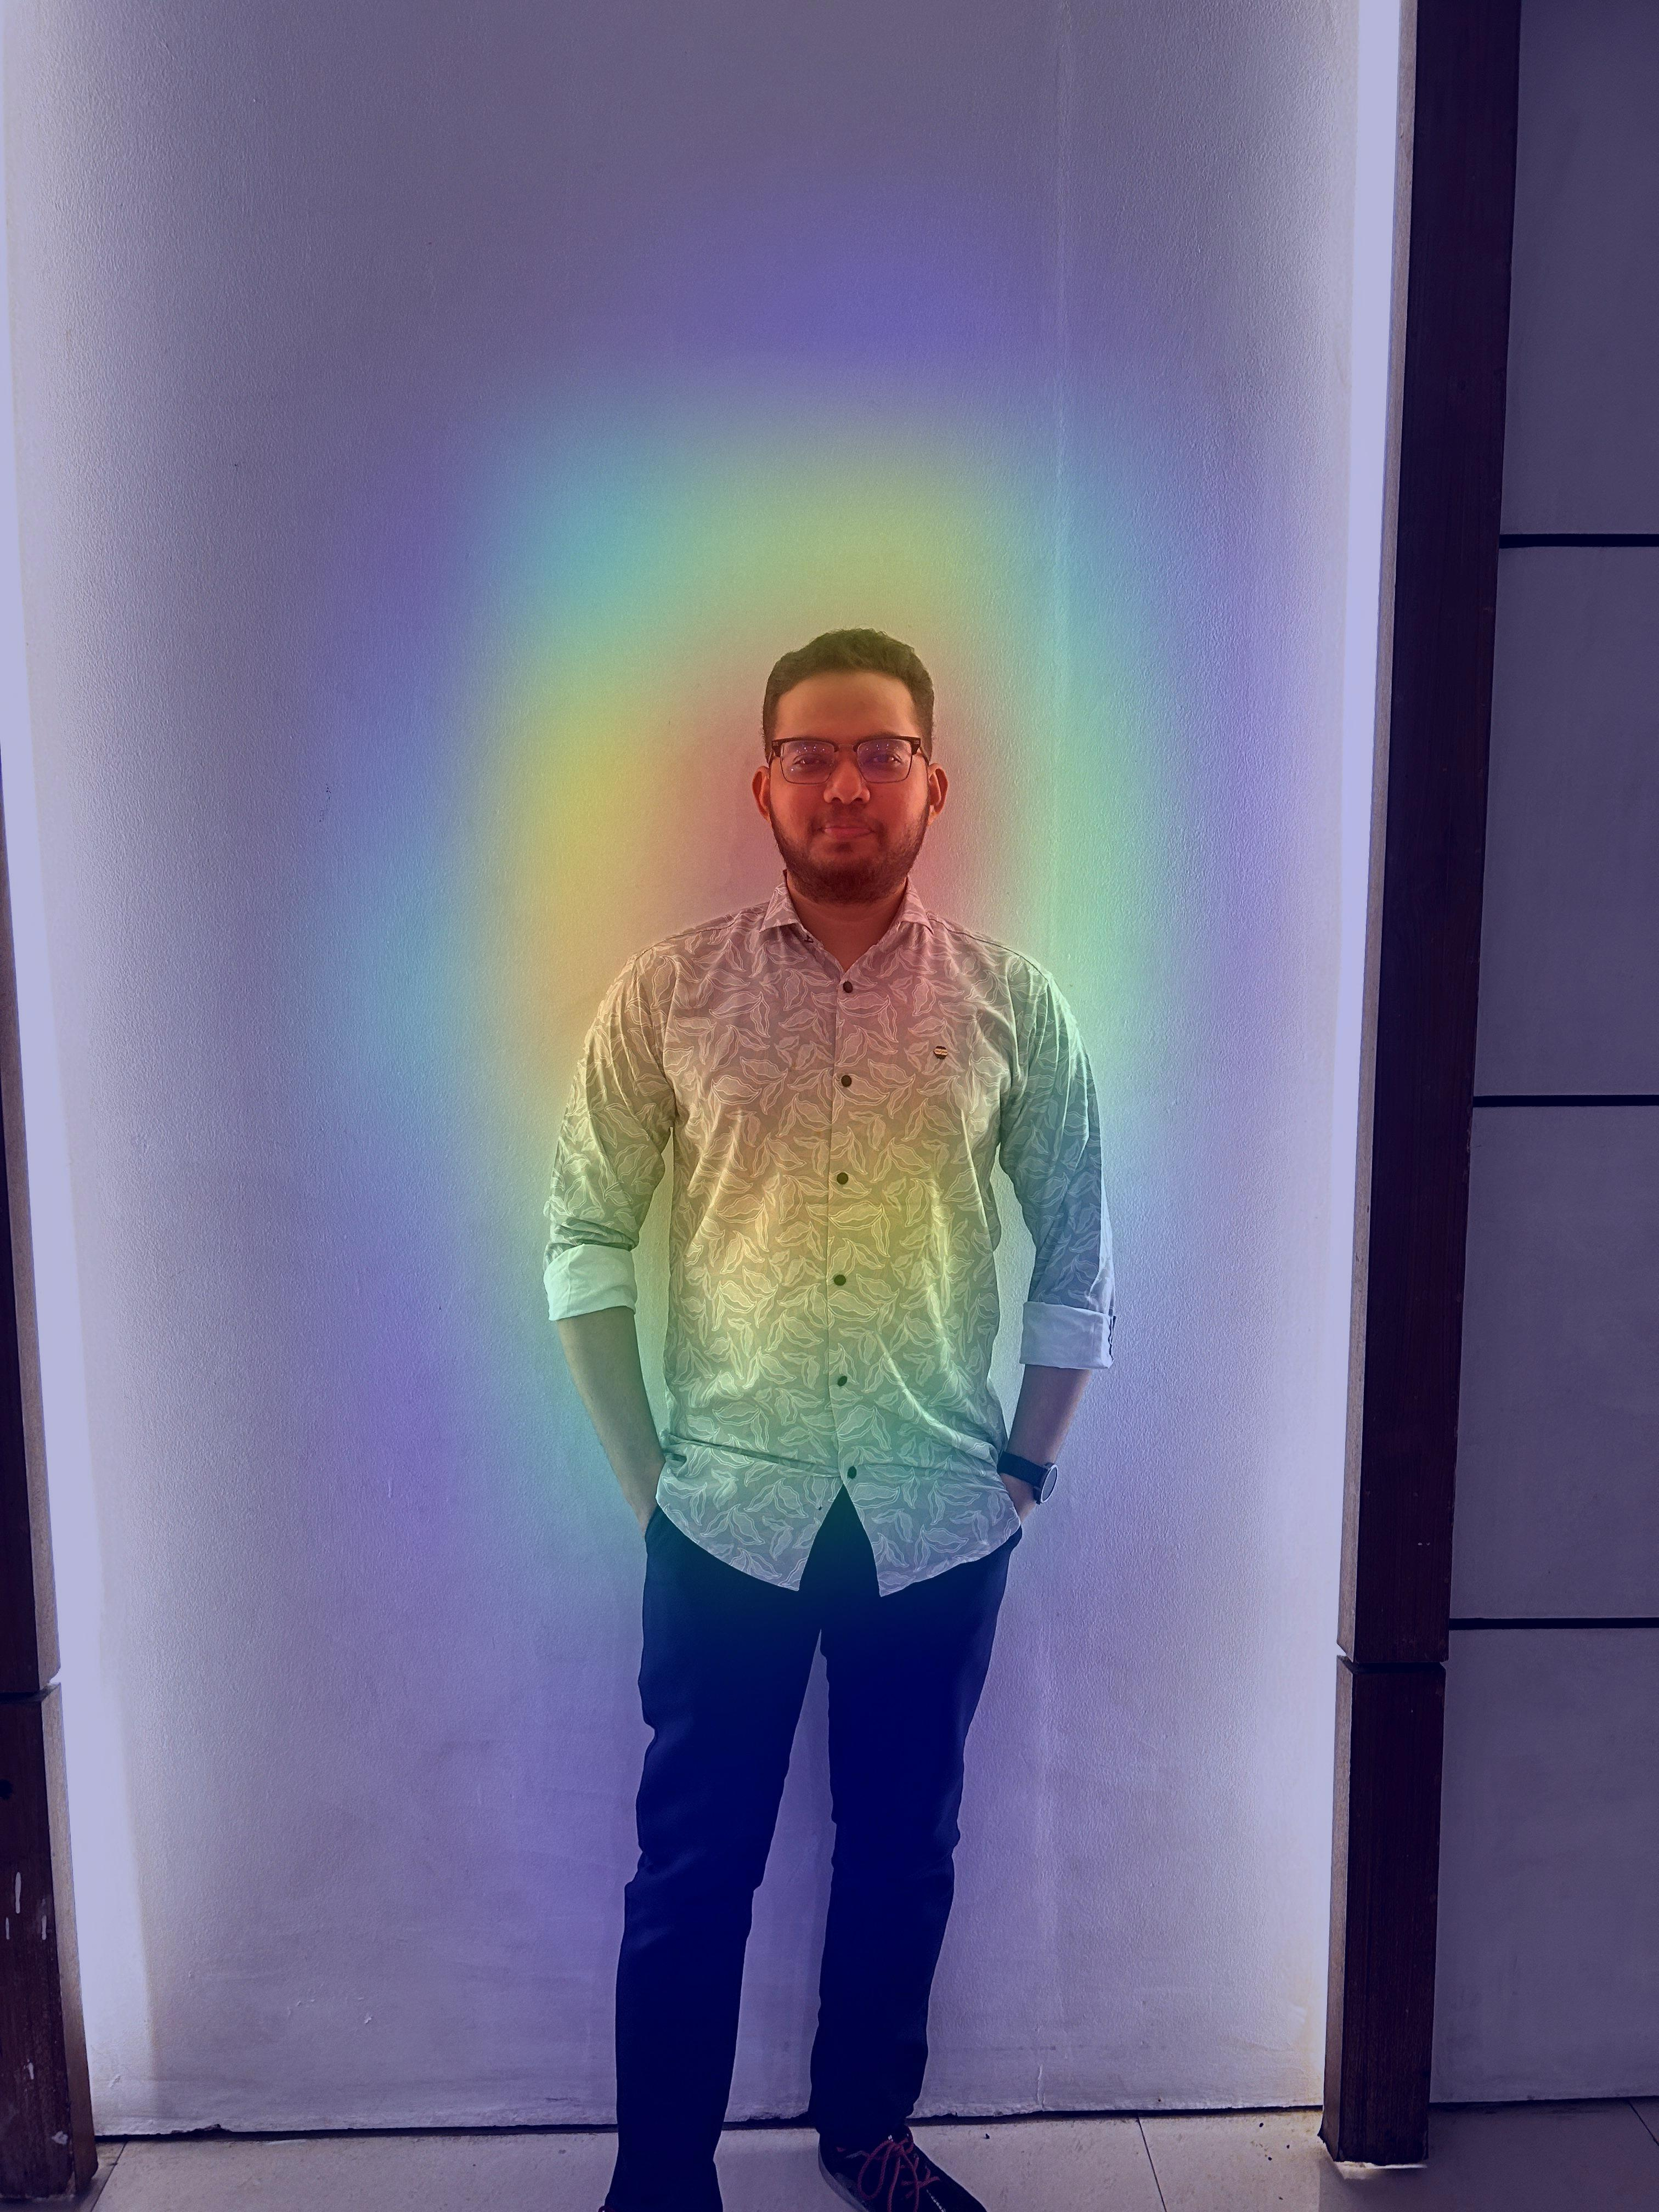

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="save_cam_image.jpg", alpha=0.4):
    ## Loading the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    ## Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    ## Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    ## Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    ## Superimpose the heatmap on original image
    Superimposed_img = jet_heatmap * alpha + img
    Superimposed_img = keras.utils.array_to_img(Superimposed_img)

    ## Save the superimposed image
    Superimposed_img.save(cam_path)

    ## Displaying Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)